In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/Ballarat.csv'
df = pd.read_csv(file_path)
print(df)

  Unnamed: 0             Unnamed: 1 Mar 2010 Unnamed: 83 Jun 2010 Unnamed: 85  \
0   Ballarat               Ballarat    1,861     $225.00    1,871     $230.00   
1        NaN  Mount Clear-Buninyong      318     $250.00      312     $250.00   
2        NaN   Sebastopol-Delacombe      593     $210.00      600     $220.00   
3        NaN    Wendouree-Alfredton      935     $230.00      890     $240.00   
4        NaN            Group Total    3,707     $225.00    3,673     $230.00   

  Sep 2010 Unnamed: 87 Dec 2010 Unnamed: 89  ... Mar 2019 Unnamed: 155  \
0    1,894     $230.00    1,893     $235.00  ...    1,715      $300.00   
1      282     $260.00      287     $260.00  ...      268      $330.00   
2      620     $220.00      647     $220.00  ...      818      $280.00   
3      870     $240.00      899     $250.00  ...    1,238      $320.00   
4    3,666     $230.00    3,726     $240.00  ...    4,039      $300.00   

  Jun 2019 Unnamed: 157 Sep 2019 Unnamed: 159 Dec 2019 Unnamed: 161 

In [2]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

In [3]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()

In [4]:
# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
print(median_data)

                  Suburb  Median.1  Median.2  Median.3  Median.4  Median.5  \
0               Ballarat     225.0     230.0     230.0     235.0     240.0   
1  Mount Clear-Buninyong     250.0     250.0     260.0     260.0     275.0   
2   Sebastopol-Delacombe     210.0     220.0     220.0     220.0     230.0   
3    Wendouree-Alfredton     230.0     240.0     240.0     250.0     250.0   
4            Group Total     225.0     230.0     230.0     240.0     240.0   

   Median.6  Median.7  Median.8  Median.9  ...  Median.32  Median.33  \
0     240.0     245.0     250.0     250.0  ...      280.0      280.0   
1     280.0     280.0     285.0     300.0  ...      315.0      320.0   
2     230.0     240.0     245.0     250.0  ...      265.0      270.0   
3     260.0     260.0     270.0     270.0  ...      295.0      300.0   
4     250.0     250.0     250.0     260.0  ...      280.0      285.0   

   Median.34  Median.35  Median.36  Median.37  Median.38  Median.39  \
0      285.0      290.0    

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_58363/4014745995.py:5: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [5]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
                  Suburb  Median.1  Median.2  Median.3  Median.4  Median.5  \
0               Ballarat       225       230       230       235       240   
1  Mount Clear-Buninyong       250       250       260       260       275   
2   Sebastopol-Delacombe       210       220       220       220       230   
3    Wendouree-Alfredton       230       240       240       250       250   
4            Group Total       225       230       230       240       240   

   Median.6  Median.7  Median.8  Median.9  ...  Median.32  Median.33  \
0       240       245       250       250  ...        280        280   
1       280       280       285       300  ...        315        320   
2       230       240       245       250  ...        265        270   
3       260       260       270       270  ...        295        300   
4       250       250       250       260  ...        280        285   

   Median.34  Median.35  Median.36  Median.37  Median.38

Growth trend for Ballarat:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  2.222222       0.0  2.173913   2.12766       0.0  2.083333   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0  2.040816       0.0        0.0  ...        0.0   1.785714   1.754386   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   1.724138   1.694915   3.333333        0.0        0.0  16.129032   

   Average Growth Rate (%)  
0                 1.213734  

[1 rows x 42 columns]


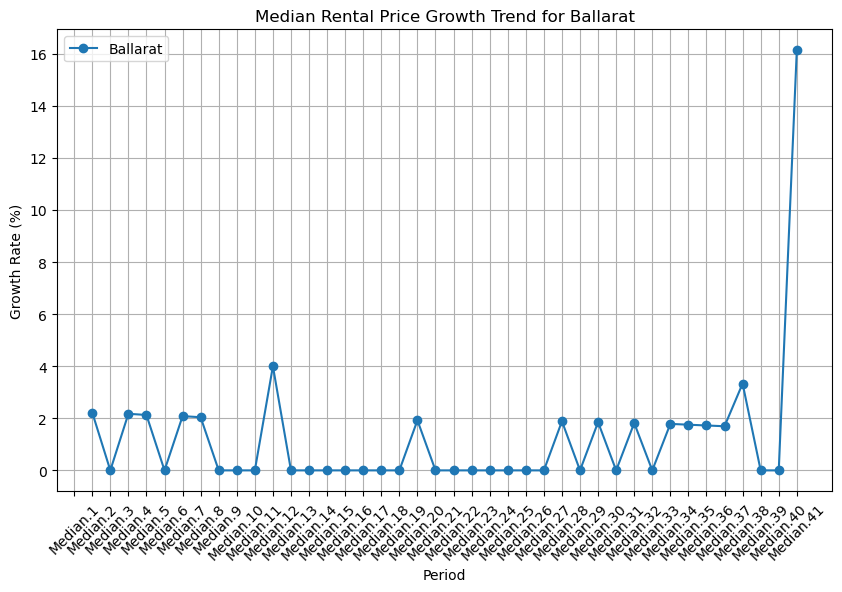

Growth trend for Mount Clear-Buninyong:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>       0.0       4.0       0.0  5.769231  1.818182       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1  1.785714  5.263158        0.0  ...   1.587302     1.5625   1.538462   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1   0.909091  -0.900901   3.030303        0.0   2.941176   6.571429   

   Average Growth Rate (%)  
1                 1.024817  

[1 rows x 42 columns]


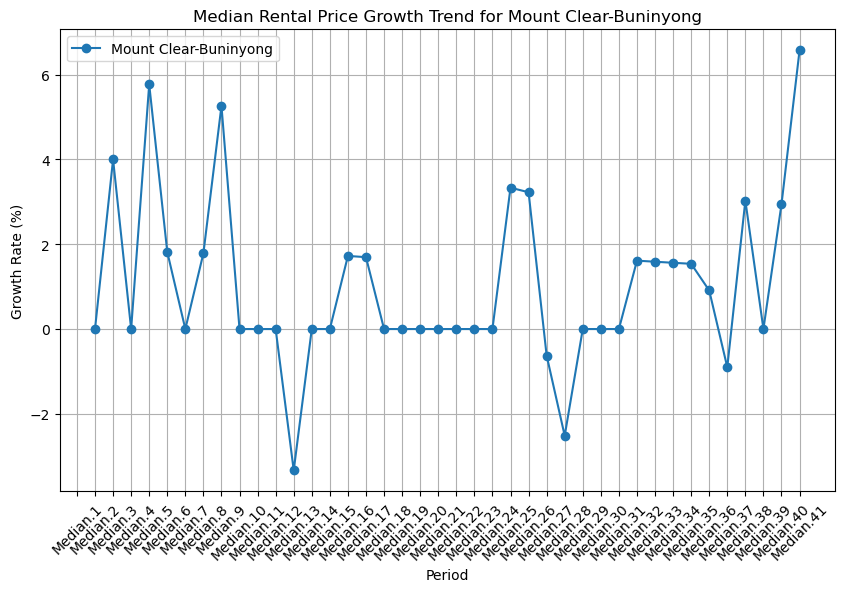

Growth trend for Sebastopol-Delacombe:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>  4.761905       0.0       0.0  4.545455       0.0  4.347826   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2  2.083333  2.040816        0.0  ...   1.886792   1.851852   1.818182   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2        0.0        0.0   3.571429        0.0   3.448276       30.0   

   Average Growth Rate (%)  
2                 1.658859  

[1 rows x 42 columns]


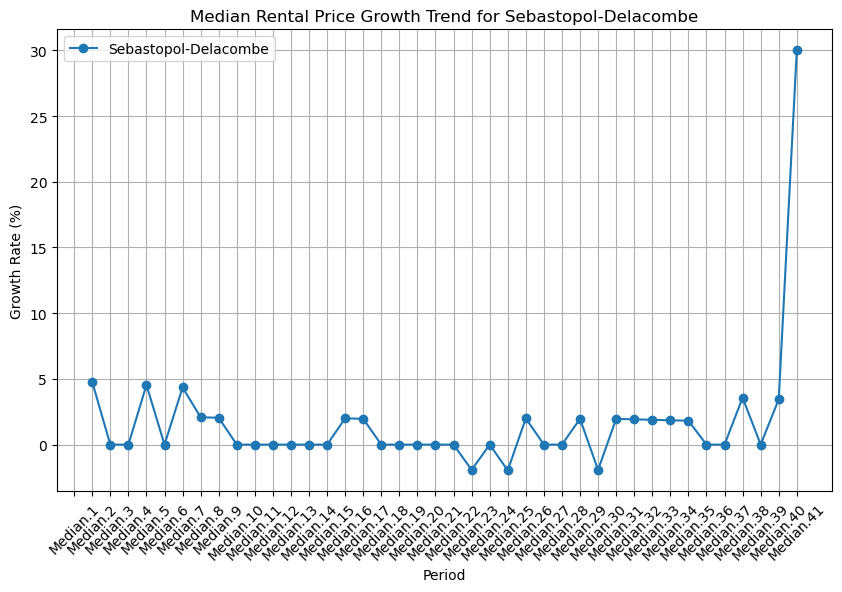

Growth trend for Wendouree-Alfredton:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>  4.347826       0.0  4.166667       0.0       4.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3  3.846154       0.0        0.0  ...   1.694915        0.0        3.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3   0.323625   3.225806        0.0      3.125        0.0  21.212121   

   Average Growth Rate (%)  
3                 1.447653  

[1 rows x 42 columns]


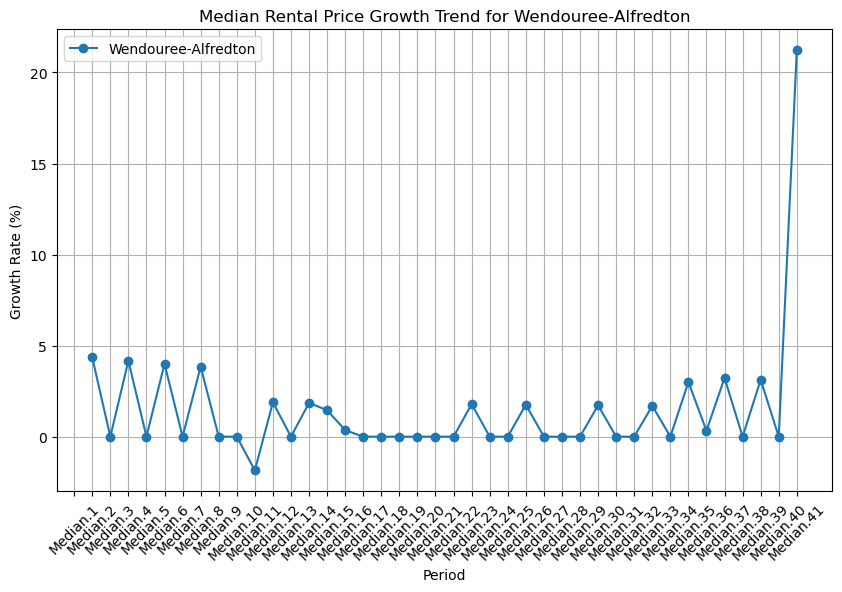

Growth trend for Group Total:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>  2.222222       0.0  4.347826       0.0  4.166667       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4       0.0       4.0        0.0  ...   1.785714   1.754386   1.724138   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4   1.694915        0.0   3.333333        0.0   3.225806      18.75   

   Average Growth Rate (%)  
4                 1.362159  

[1 rows x 42 columns]


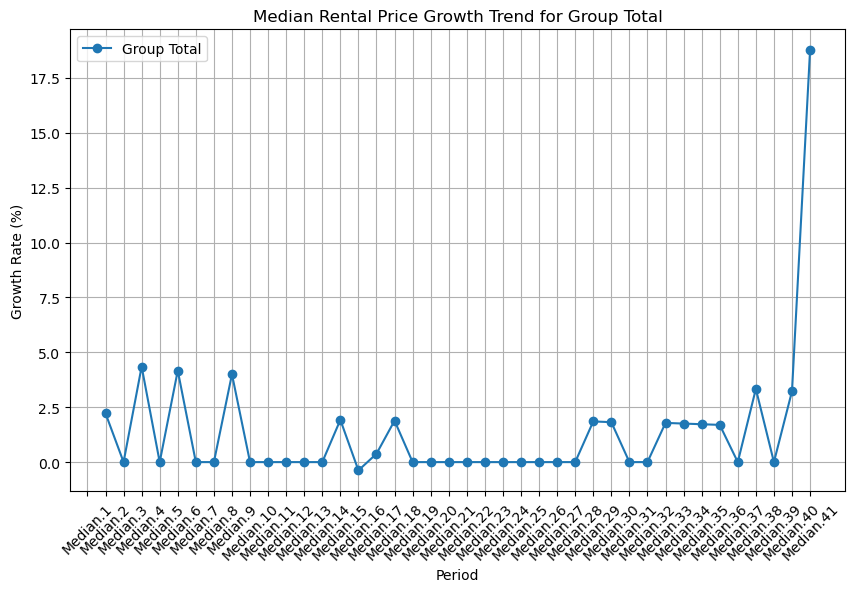

All suburbs growth trends:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  2.222222       0.0  2.173913   2.12766       0.0  2.083333   
1      <NA>       0.0       4.0       0.0  5.769231  1.818182       0.0   
2      <NA>  4.761905       0.0       0.0  4.545455       0.0  4.347826   
3      <NA>  4.347826       0.0  4.166667       0.0       4.0       0.0   
4      <NA>  2.222222       0.0  4.347826       0.0  4.166667       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0  2.040816       0.0        0.0  ...        0.0   1.785714   1.754386   
1  1.785714  5.263158        0.0  ...   1.587302     1.5625   1.538462   
2  2.083333  2.040816        0.0  ...   1.886792   1.851852   1.818182   
3  3.846154       0.0        0.0  ...   1.694915        0.0        3.0   
4       0.0       4.0        0.0  ...   1.785714   1.754386   1.724138   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   1.

In [6]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)

In [7]:
print(growth_trends["Average Growth Rate (%)"])

0    1.213734
1    1.024817
2    1.658859
3    1.447653
4    1.362159
Name: Average Growth Rate (%), dtype: Float64
